In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from IPython.display import HTML, Image

%matplotlib inline
sns.set()

from sklearn.datasets.samples_generator import make_circles


In [2]:
def feature_map_1(X):
    return np.asarray((X[:,0], X[:,1], X[:,0]**2 + X[:,1]**2)).T

Text(0.5, 0.92, 'Transformed dataset')

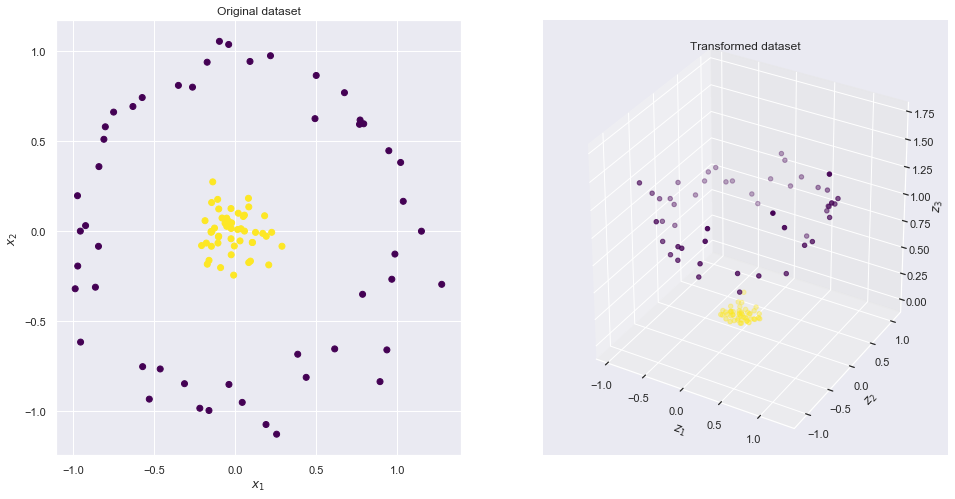

In [3]:
#Generate dataset and feature-map
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
Z = feature_map_1(X)

#2D scatter plot
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original dataset')

#3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:,0],Z[:,1], Z[:,2],c = y, cmap = 'viridis' ) #,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed dataset')

In [28]:
dataset = pd.read_csv('Beximco1.csv', index_col='Date', parse_dates=['Date']) 
del dataset['Volume']
dataset.head(10)

,Open,High,Low,Close
Date,,,,
2010-01-03,75.499933,78.241781,75.499933,77.672719
2010-01-04,78.552179,78.552179,76.482860,77.000190
2010-01-05,77.517520,79.121242,76.689792,78.603912
2010-01-06,78.862577,80.621499,78.707378,80.104169
2010-01-07,80.673232,80.673232,79.328174,79.638572
2010-01-10,80.621499,81.190562,79.638572,80.983630
2010-01-11,81.190562,81.190562,78.914310,79.535106
2010-01-12,79.224708,79.638572,78.810844,79.121242
2010-01-13,79.121242,80.414567,76.844991,77.414054


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a190c5d30>,
      dtype=object)

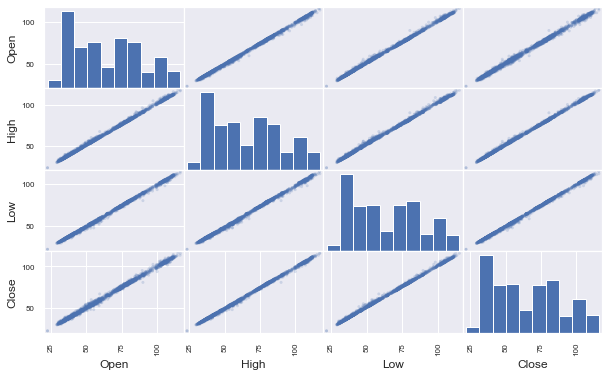

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, alpha=0.2, figsize=(10, 6), diagonal='hist')

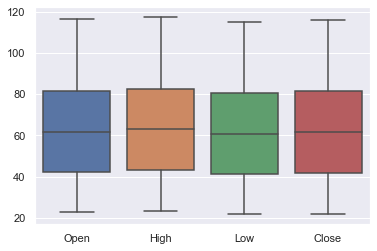

In [6]:
import seaborn as sns
sns.boxplot(data=dataset)

In [29]:
training_set = dataset['2016':'2018'].iloc[:,0:4] #2014-2018 is our training data
training_set.tail(3)

,Open,High,Low,Close
Date,,,,
2018-12-24,75.6,76.5,75.5,76.2
2018-12-26,76.3,78.5,76.2,77.6
2018-12-27,78.0,79.4,77.6,79.1


In [30]:
test_set = dataset['2018':].iloc[:,3:4] #Closing Price of 2018 is our test data (target  variable is Closing Price)
test_set.head(3)

,Close
Date,
2018-01-01,102.75
2018-01-02,102.75
2018-01-03,102.05


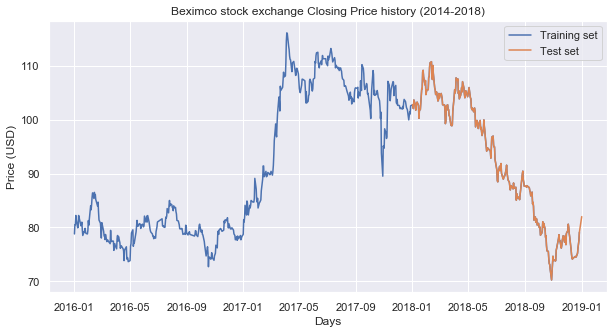

In [31]:
plt.figure(figsize=(10,5))

plt.plot(training_set["Close"])
plt.plot(test_set["Close"])

plt.title('Beximco stock exchange Closing Price history (2014-2018)')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Training set','Test set'], loc='best')
plt.savefig('Bex.png')
plt.show()

Text(0.5, 0.92, 'Transformed dataset')

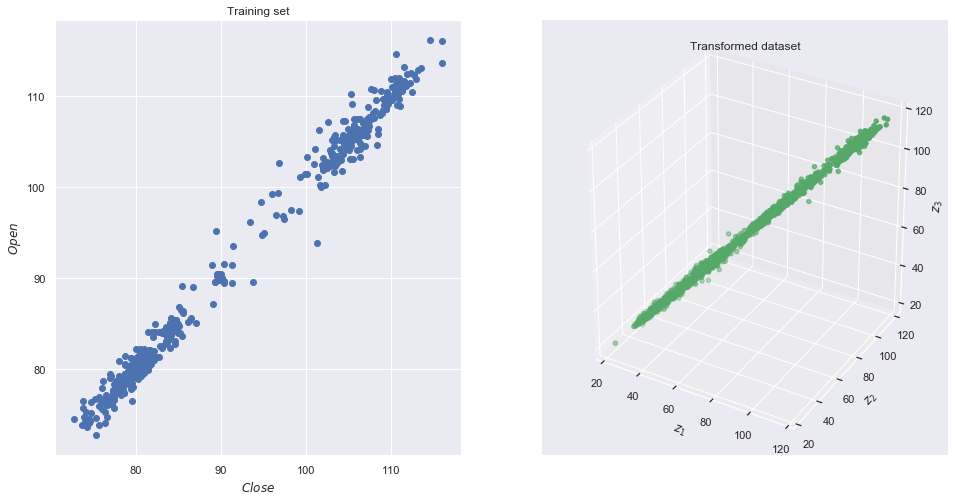

In [62]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(training_set["Close"], training_set["lag1"],cmap = 'viridis')
ax.set_xlabel('$Close$')
ax.set_ylabel('$Open$')
ax.set_title('Training set')


ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(dataset['Open'],dataset['High'],dataset['Close'], c = 'g',cmap = 'jet' ) #,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed dataset')


In [34]:
dataset['lag1'] = dataset['Close'].shift(-1)
dataset['lag2'] = dataset['Close'].shift(-2)

dataset = dataset.dropna(how = 'any')
dataset.head(10)

,Open,High,Low,Close,lag1,lag2
Date,,,,,,
2010-01-03,75.499933,78.241781,75.499933,77.672719,77.000190,78.603912
2010-01-04,78.552179,78.552179,76.482860,77.000190,78.603912,80.104169
2010-01-05,77.517520,79.121242,76.689792,78.603912,80.104169,79.638572
2010-01-06,78.862577,80.621499,78.707378,80.104169,79.638572,80.983630
2010-01-07,80.673232,80.673232,79.328174,79.638572,80.983630,79.535106
2010-01-10,80.621499,81.190562,79.638572,80.983630,79.535106,79.121242
2010-01-11,81.190562,81.190562,78.914310,79.535106,79.121242,77.414054
2010-01-12,79.224708,79.638572,78.810844,79.121242,77.414054,79.638572
2010-01-13,79.121242,80.414567,76.844991,77.414054,79.638572,79.586839


In [50]:
training_set = dataset['2016':'2017'].iloc[:,3:6] #2014-2017 is our training data
training_set.head(5)

,Close,lag1,lag2
Date,,,
2016-01-03,78.785714,80.500000,80.500000
2016-01-04,80.500000,80.500000,82.214286
2016-01-05,80.500000,82.214286,81.452381
2016-01-06,82.214286,81.452381,79.928571
2016-01-07,81.452381,79.928571,80.023810


In [51]:

test_set = dataset['2018':].iloc[:,3:6] #2018 is our test data ( target  variable is Closing Price)
test_set.head(5)

,Close,lag1,lag2
Date,,,
2018-01-01,102.75,102.75,102.05
2018-01-02,102.75,102.05,103.65
2018-01-03,102.05,103.65,102.85
2018-01-04,103.65,102.85,101.75
2018-01-07,102.85,101.75,102.45


Text(0.5, 0.92, 'Training set')

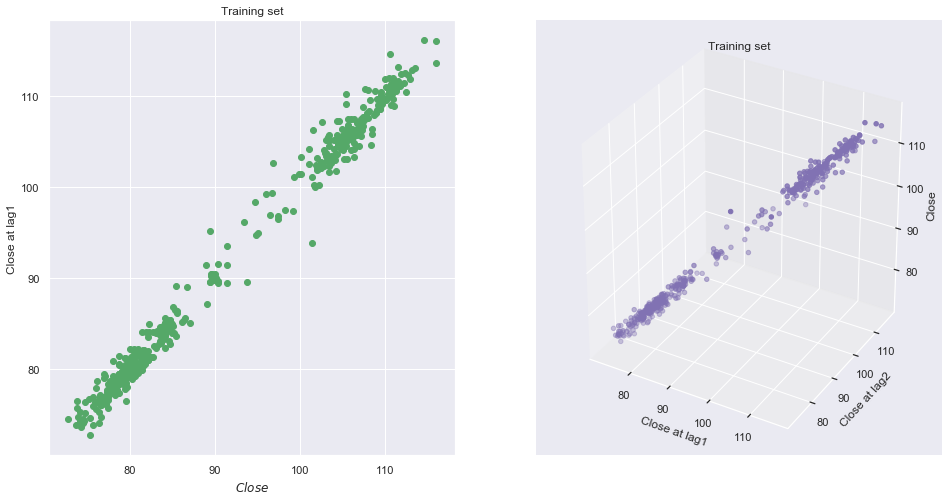

In [74]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(training_set["Close"], training_set["lag1"], c= "g",cmap = 'viridis')
ax.set_xlabel('$Close$')
ax.set_ylabel('Close at lag1')
ax.set_title('Training set')


ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(training_set['lag1'],training_set['lag2'],training_set['Close'], c = 'm',cmap = 'jet') #,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('Close at lag1')
ax.set_ylabel('Close at lag2')
ax.set_zlabel('Close')
ax.set_title('Training set')

In [66]:
X_train = training_set.drop('lag1', axis=1)
y_train = training_set['lag1']

X_test = test_set.drop('lag1', axis = 1)
y_test = test_set['lag1']

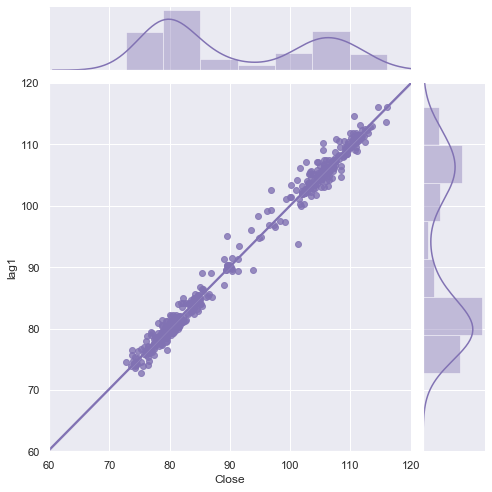

In [72]:
import seaborn as sns
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot("Close", "lag1", data=training_set, kind="reg",
                  xlim=(60, 120), ylim=(60, 120), color="m", height=7)

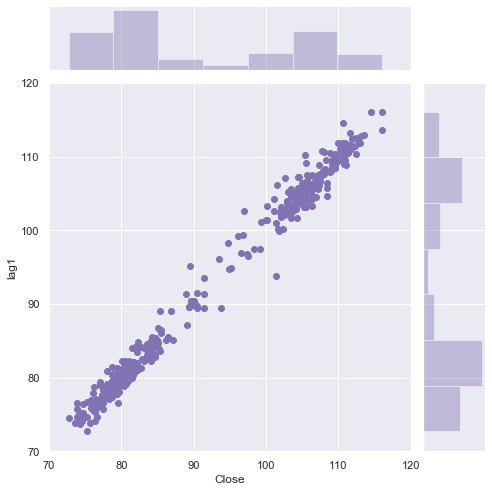

In [87]:
import seaborn as sns
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot("Close", "lag1", data=training_set, kind="scatter",
                  xlim=(70, 120), ylim=(70, 120), color="m", height=7)

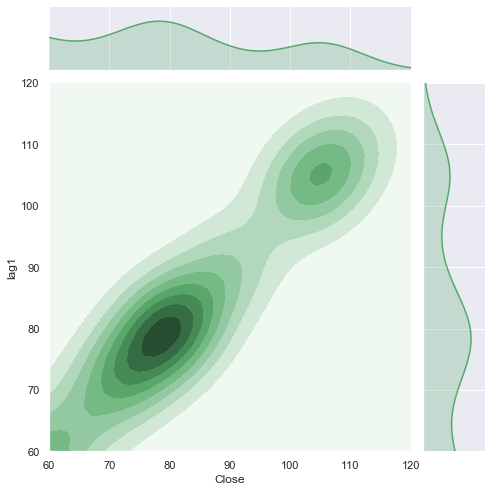

In [88]:
import seaborn as sns
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot("Close", "lag1", data=dataset, kind="kde",
                  xlim=(60, 120), ylim=(60, 120), color="g", height=7)

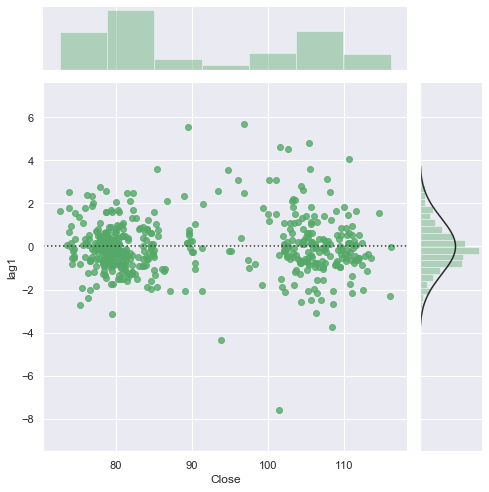

In [90]:
import seaborn as sns
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot("Close", "lag1", data=training_set, kind="resid", color="g", height=7)